# Top Games on Google Play Store - An EDA

# Problem Context

A mobile game developer is planning to develop an Android game and put it on [Google Play Store](https://play.google.com/store/apps). The developer wants to strategically analyze the top existing games on Play Store in order to have a better sense of what to develop. The main questions that the developer wants an answer are:

1. Which types of games are more successful in number of ratings?
2. Paid or free games? If paid, what is a good price to go for?
4. Which types of games are growing at the moment?
3. Which types of games have the highest overall ratings?

We'll answer these questions using an Exploratory Data Analysis (EDA) approach using the "*android-games.csv*" dataset which can be found at [Top Games of Google Play Store](https://www.kaggle.com/dhruvildave/top-play-store-games).

For now, there won't be a data cleaning step.

# Data Exploration

### Import the Libraries Used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


sns.set_theme(style = 'white') # theme used for the seaborn graphs

### Load and Read Data

In [2]:
data_path = 'android-games.csv'
raw_data = pd.read_csv(data_path)

### Basic Data Information

In [3]:
raw_data.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False


We can see that we have the following features:
* __rank__: Rank in a particular category
* __title__: Game title
* __total ratings__: Total number of ratings
* __installs__: Approximate install milestone
* __average rating__: Average rating out of 5
* __growth (30 days)__: Percent growth in 30 days
* __growth (60 days)__: Percent growth in 60 days
* __price__: Price in dollars
* __category__: Game category
* __5 star ratings__: Number of 5 star ratings
* __4 star ratings__: Number of 4 star ratings
* __3 star ratings__: Number of 3 star ratings
* __2 star ratings__: Number of 2 star ratings
* __1 star ratings__: Number of 1 star ratings
* __paid__: Whether the game is paid or not

There's not a lot of features in this dataset, but every one of them appears to be useful (maybe not the "*title*" for a numerical standpoint, but we'll keep it on the dataset for now).

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 191.0+ KB


In [5]:
raw_data.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

There is no null data and all the columns are filled on every row. This is expected since every game on Play Store must have all these information filled.

In [6]:
raw_data.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.000000,1.730000e+03,1730.000000,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,50.475723,1.101182e+06,4.313410,193.167341,3.969249,0.012965,7.883837e+05,1.216466e+05,5.954986e+04,2.796247e+04,1.036364e+05
std,28.941630,3.311738e+06,0.253545,4775.617650,18.912904,0.243492,2.483061e+06,2.955701e+05,1.447400e+05,7.676625e+04,3.589869e+05
min,1.000000,3.823800e+04,3.090000,0.000000,0.000000,0.000000,2.189800e+04,2.441000e+03,7.070000e+02,2.880000e+02,5.270000e+02
25%,25.000000,1.879988e+05,4.180000,0.100000,0.300000,0.000000,1.358290e+05,2.180200e+04,1.027775e+04,4.529500e+03,1.356075e+04
50%,51.000000,4.576750e+05,4.330000,0.500000,1.000000,0.000000,3.109435e+05,5.464350e+04,2.665850e+04,1.133050e+04,3.569400e+04
75%,75.750000,9.443342e+05,4.490000,1.600000,3.300000,0.000000,6.511310e+05,1.095648e+05,5.581750e+04,2.526650e+04,8.632625e+04
max,100.000000,8.067866e+07,4.910000,140394.400000,605.100000,7.490000,6.193571e+07,5.397273e+06,2.795172e+06,1.814999e+06,9.654037e+06


# Price Analysis

From a preliminary analysis of the `raw_data.describe()` above, we can see that more than 75% of the top games are free (by checking when the "_price_" is 0.00). In fact, let's check the total (as a percentage):

In [7]:
# total free and paid games as a percentage
raw_data['paid'].value_counts(normalize = True) * 100 

False    99.595376
True      0.404624
Name: paid, dtype: float64

So only 0.40% of the games in this list are paid games (that acounts for only 7 games).

To find the paid games on this list we use:

In [8]:
raw_data[raw_data['paid'] == True].sort_values(by = 'price', ascending = False)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
211,12,Minecraft,3999232,10.0 M,4.54,1.4,2.8,7.49,GAME ARCADE,3214765,312995,138682,70661,262126,True
153,54,Terraria,317546,1.0 M,4.65,1.0,2.3,4.99,GAME ADVENTURE,264563,24837,10184,4387,13572,True
477,64,Reigns,146504,500.0 k,4.58,0.1,0.2,2.99,GAME CARD,108627,25330,5696,2743,4105,True
261,62,Geometry Dash,767518,1.0 M,4.62,0.6,1.2,1.99,GAME ARCADE,623950,73997,25169,9705,34694,True
869,46,Cytus II,109687,1.0 M,4.59,1.0,2.2,1.99,GAME MUSIC,86420,12246,4534,1999,4484,True
1588,65,Trivia Crack (No Ads),74594,500.0 k,4.58,0.9,2.2,1.99,GAME TRIVIA,55411,12625,3123,1117,2315,True
91,92,Hitman Sniper,848831,10.0 M,4.41,0.3,0.8,0.99,GAME ACTION,607502,115334,48040,19224,58729,True


Here we have __Minecraft__ as the most expensive game on this list, costing $7.49, with more than 10.0 M installs at the time this dataset was gathered. __Minecraft__ is also the most popular game among the paid ones, so price is not a problem for game success or popularity.

In [9]:
paid_games = raw_data[raw_data['paid'] == True]
paid_games.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000
mean,56.428571,8.948446e+05,4.567143,0.757143,1.671429,3.204286,7.087483e+05,82480.571429,33632.571429,15690.857143,54289.285714
std,24.206453,1.404642e+06,0.077398,0.450397,0.946422,2.270410,1.130571e+06,108543.298241,49027.945799,25051.010109,93948.601940
min,12.000000,7.459400e+04,4.410000,0.100000,0.200000,0.990000,5.541100e+04,12246.000000,3123.000000,1117.000000,2315.000000
25%,50.000000,1.280955e+05,4.560000,0.450000,1.000000,1.990000,9.752350e+04,18731.000000,5115.000000,2371.000000,4294.500000
50%,62.000000,3.175460e+05,4.580000,0.900000,2.200000,1.990000,2.645630e+05,25330.000000,10184.000000,4387.000000,13572.000000
75%,64.500000,8.081745e+05,4.605000,1.000000,2.250000,3.990000,6.157260e+05,94665.500000,36604.500000,14464.500000,46711.500000
max,92.000000,3.999232e+06,4.650000,1.400000,2.800000,7.490000,3.214765e+06,312995.000000,138682.000000,70661.000000,262126.000000


In [10]:
paid_games.median()

rank                    62.00
total ratings       317546.00
average rating           4.58
growth (30 days)         0.90
growth (60 days)         2.20
price                    1.99
5 star ratings      264563.00
4 star ratings       25330.00
3 star ratings       10184.00
2 star ratings        4387.00
1 star ratings       13572.00
paid                     1.00
dtype: float64

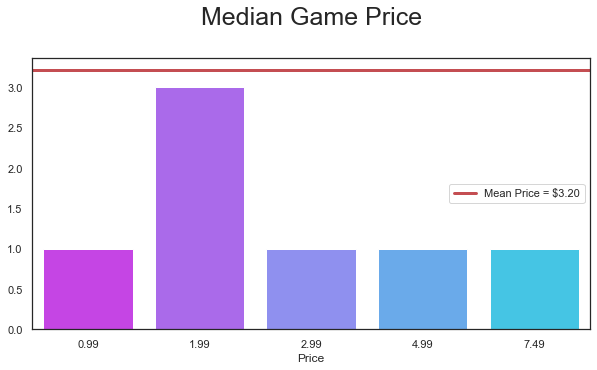

In [11]:
f, ax = plt.subplots(figsize = (10, 5))

sns.countplot(x = 'price',
              data = paid_games,
              palette = 'cool_r')

ax.set_title('Median Game Price',
             fontsize = 25,
             y = 1.1)

ax.set(ylabel = '',
       xlabel = 'Price')

ax.axhline(paid_games['price'].mean(),
          color = 'r',
          linewidth = 3,
          label = 'Mean Price = $3.20')

plt.legend()

We only have 7 values to analyse, so it's easy to see it through a pandas DataFrame, but a graph is more visually pleasing for this.

By analysing the price, we see that the __average game price is &#0036;3.20__ and that most games on this list are priced at &#0036;1.99 (we can see that from the median).

# Category Analysis

In [12]:
raw_data['category'].unique()

array(['GAME ACTION', 'GAME ADVENTURE', 'GAME ARCADE', 'GAME BOARD',
       'GAME CARD', 'GAME CASINO', 'GAME CASUAL', 'GAME EDUCATIONAL',
       'GAME MUSIC', 'GAME PUZZLE', 'GAME RACING', 'GAME ROLE PLAYING',
       'GAME SIMULATION', 'GAME SPORTS', 'GAME STRATEGY', 'GAME TRIVIA',
       'GAME WORD'], dtype=object)

We have 17 different game categories in this dataset.

In [13]:
raw_data['category'].value_counts()

GAME CARD            122
GAME WORD            106
GAME CASUAL          102
GAME TRIVIA          100
GAME ARCADE          100
GAME MUSIC           100
GAME RACING          100
GAME SPORTS          100
GAME EDUCATIONAL     100
GAME STRATEGY        100
GAME CASINO          100
GAME ACTION          100
GAME PUZZLE          100
GAME ROLE PLAYING    100
GAME SIMULATION      100
GAME ADVENTURE       100
GAME BOARD           100
Name: category, dtype: int64

Let's create a new pandas.DataFrame using the original dataset and grouping by the game category. Here we drop the "*rank*" since it's not relevant for now (if we add it, it would just be the sum from 1 to 100 (depending on the category, some have more games, "*GAME CARD*" contains 122 games, for example)). We also drop the "*paid*" column since it behaves as a sum of True or False values, also not relevant at the moment.

In [14]:
categories_df = raw_data.groupby(['category'], as_index = False).mean().drop(labels = 'rank', axis = 1).drop(labels = 'paid', axis = 1)
categories_df

,category,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
0,GAME ACTION,4.133757e+06,4.246100,1452.539000,2.569000,0.009900,2.974529e+06,359160.520000,198417.800000,109798.300000,491848.980000
1,GAME ADVENTURE,9.197175e+05,4.264200,30.868000,4.305000,0.049900,6.484247e+05,103462.420000,51665.380000,24650.120000,91512.380000
2,GAME ARCADE,1.851670e+06,4.294900,23.242000,3.091000,0.094800,1.337318e+06,194447.470000,104659.430000,49336.250000,165906.750000
3,GAME BOARD,4.708535e+05,4.347100,157.328000,4.501000,0.000000,3.385803e+05,51618.750000,23180.920000,10893.000000,46578.030000
4,GAME CARD,3.217771e+05,4.421066,2.028689,2.863934,0.024508,2.290758e+05,45030.131148,16209.901639,6788.516393,24670.319672
5,GAME CASINO,3.711927e+05,4.437800,2.226000,3.352000,0.000000,2.748301e+05,41352.810000,18641.410000,7763.390000,28602.500000
6,GAME CASUAL,2.496518e+06,4.335196,19.771569,2.099020,0.000000,1.812148e+06,287281.205882,134767.215686,59794.049020,202524.960784
7,GAME EDUCATIONAL,1.424358e+05,4.253600,99.569000,13.636000,0.000000,1.010035e+05,13420.860000,7867.360000,4722.060000,15419.620000
8,GAME MUSIC,2.245122e+05,4.180300,2.477000,7.006000,0.019900,1.547905e+05,23005.390000,13782.860000,7316.530000,25614.320000
9,GAME PUZZLE,9.839270e+05,4.394200,2.232000,2.153000,0.000000,7.082231e+05,128189.110000,58375.640000,23546.900000,65589.710000


We can now see how the columns behave in this new dataset:

* __total_ratings__: The sum of the total rating of all games in the category.
* __average rating__: The average rating of the whole category.
* __growth (30 days)__: The sum of the growth (30 days) of all games in the category.
* __growth (60 days)__: The sum of the growth (60 days) of all games in the category.
* __price__: The sum of the prices of all games in the category.
* __5 star ratings__: The sum of the 5 star rating from each game of the category.
* __4 star ratings__: The sum of the 4 star rating from each game of the category.
* __3 star ratings__: The sum of the 3 star rating from each game of the category.
* __2 star ratings__: The sum of the 2 star rating from each game of the category.
* __1 star ratings__: The sum of the 1 star rating from each game of the category.

Since the number of installs is not a numerical value, but instead it is a range, we'll use the number of ratings as a metric of game popularity (here we are assuming that the higher the number of installs is, the higher the number of ratings.

[(4.0, 4.5), Text(0, 0.5, ''), Text(0.5, 0, 'Average Rating')]

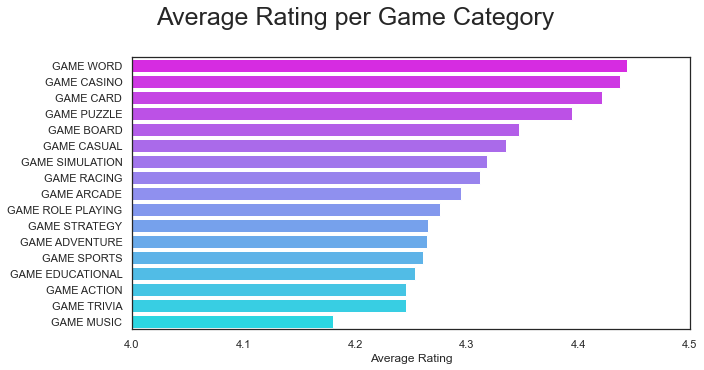

In [15]:
f, ax = plt.subplots(figsize = (10, 5))

sns.barplot(x = 'average rating',
            y = 'category',
            data = categories_df,
            palette = 'cool_r',
            order = categories_df.sort_values('average rating', ascending = False).category)

ax.set_title('Average Rating per Game Category',
             fontsize = 25,
             x = 0.4,
             y = 1.1)

ax.set(xlim = (4, 4.5),
       ylabel = '',
       xlabel = 'Average Rating')

Text(0, 0.5, '')

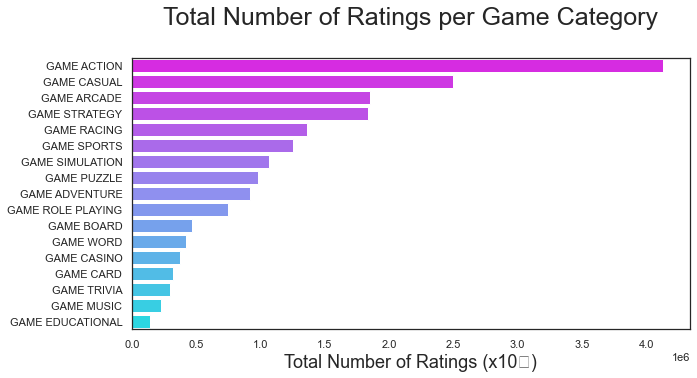

In [16]:
f, ax = plt.subplots(figsize = (10, 5))

sns.barplot(x = 'total ratings',
            y = 'category',
            data = categories_df,
            palette = 'cool_r',
            order = categories_df.sort_values('total ratings', ascending = False).category)

ax.set_title('Total Number of Ratings per Game Category',
             fontsize = 25,
             y = 1.1)

ax.set_xlabel('Total Number of Ratings (x10⁶)',fontsize = 18)
ax.set_ylabel('')

It is easy to see that __Action__ games dominate the market by Total Number of Ratings.

# Growth Analysis

In [17]:
growth_30_days = raw_data.groupby('category', as_index=False)['growth (30 days)'].mean()
growth_30_days

,category,growth (30 days)
0,GAME ACTION,1452.539000
1,GAME ADVENTURE,30.868000
2,GAME ARCADE,23.242000
3,GAME BOARD,157.328000
4,GAME CARD,2.028689
5,GAME CASINO,2.226000
6,GAME CASUAL,19.771569
7,GAME EDUCATIONAL,99.569000
8,GAME MUSIC,2.477000
9,GAME PUZZLE,2.232000


In [18]:
growth_60_days = raw_data.groupby('category', as_index=False)['growth (60 days)'].mean()
growth_60_days

,category,growth (60 days)
0,GAME ACTION,2.569000
1,GAME ADVENTURE,4.305000
2,GAME ARCADE,3.091000
3,GAME BOARD,4.501000
4,GAME CARD,2.863934
5,GAME CASINO,3.352000
6,GAME CASUAL,2.099020
7,GAME EDUCATIONAL,13.636000
8,GAME MUSIC,7.006000
9,GAME PUZZLE,2.153000


[Text(0, 0.5, ''), Text(0.5, 0, 'Average 60 Day Growth')]

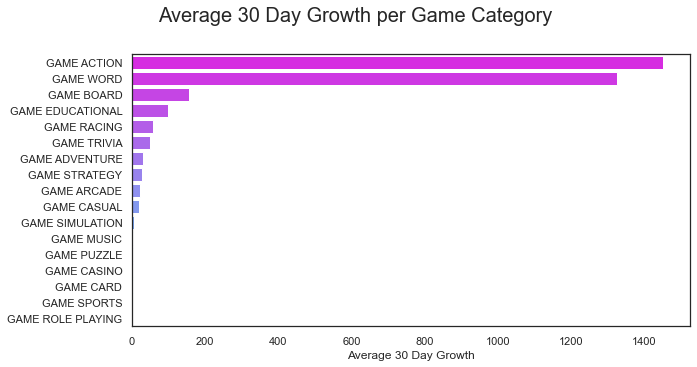

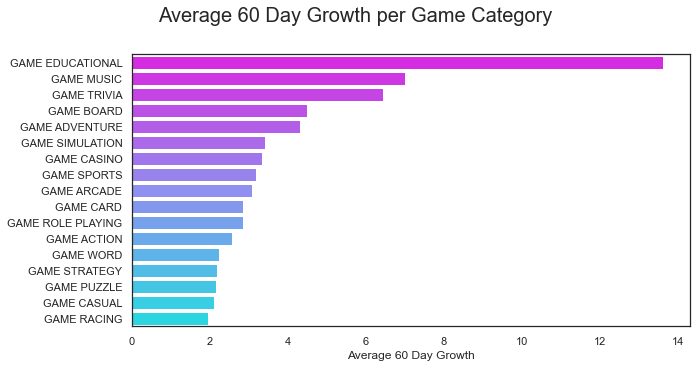

In [19]:
f, ax = plt.subplots(figsize = (10, 5))

sns.barplot(x = 'growth (30 days)',
            y = 'category',
            data = growth_30_days,
            palette = 'cool_r',
            order = growth_30_days.sort_values('growth (30 days)', ascending = False).category)

ax.set_title('Average 30 Day Growth per Game Category',
             fontsize = 20,
             x = 0.4,
             y = 1.1)

ax.set(ylabel = '',
       xlabel = 'Average 30 Day Growth')



f, ax = plt.subplots(figsize = (10, 5))

sns.barplot(x = 'growth (60 days)',
            y = 'category',
            data = growth_60_days,
            palette = 'cool_r',
            order = growth_60_days.sort_values('growth (60 days)', ascending = False).category)

ax.set_title('Average 60 Day Growth per Game Category',
             fontsize = 20,
             x = 0.4,
             y = 1.1)

ax.set(ylabel = '',
       xlabel = 'Average 60 Day Growth')

Considering the last 30 days (from the date this dataset was gathered), __Action__ and __Word__ games have the highest growth among the categories listed. Analysing the last 60 days (again, from the time this dataset was gathered), we see that __Educational__ games had the highest growth.

In [20]:
a = [] # empty list

# average number of ratings of paid games

a.append( raw_data[raw_data['paid'] == True]['total ratings'].mean() )

# average number of ratings of free games

a.append( raw_data[raw_data['paid'] == False]['total ratings'].mean() )

a

[894844.5714285715, 1102019.8224027858]

Text(0, 0.5, 'Average Number of Ratings (x10⁶)')

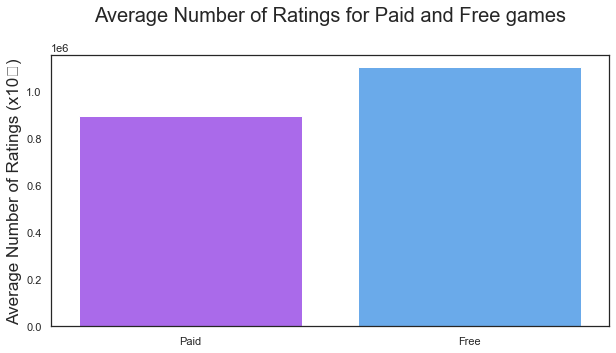

In [21]:
f, ax = plt.subplots(figsize = (10, 5))

sns.barplot(x = ['Paid', 'Free'],
            y = a,
            palette = 'cool_r')

ax.set_title('Average Number of Ratings for Paid and Free games',
             fontsize = 20,
             y = 1.1)

ax.set_xlabel('')
ax.set_ylabel('Average Number of Ratings (x10⁶)', fontsize = 17)

So, we see that __Free Games__ have a higher average number of ratings than __Paid Games__.

# Answering the Questions

__1. Which types of games are more successful in number of ratings?__

Since we didn't use the number of installs in our analysis (because we don't have an exact value for each game, just a range), we can infer the success for each type of game from the total number of ratings for each category. With this in mind, the "__ACTION__" category has the highest number of ratings at $4.13 \times 10^6$ installs, which shows the popularity of action mobile games.

__2. Paid or free games? If paid, what is a good price to go for?__

We have seen that free games have a higher average number of ratings than paid games, so it could be a better option for a game developer to go for a free game. If the game is paid, a generally good price can be set at $1.99.

__3. Which types of games are growing at the moment?__

Considering the last 30 days (from the time this dataset was gathered), the categories the are growing more rapidly at the moment are __Action__ and __Word__ games.

__4. Which types of games have the highest overall ratings?__

Seeing as this is a list with the most popular games, the overall ratings are not too different from each other, but __Word__ games and __Cassino__ games have the highest ratings amongst all categories.

In conclusion, __Action__ mobile Android games perform very well at Google Play Store in almost every metric analysed.